In [92]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("denkuznetz/taxi-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/denkuznetz/taxi-price-prediction/versions/1


In [93]:
import os
import shutil

# Assuming 'path' variable from the previous code block holds the directory
# where the downloaded files are located.  Replace with the actual path if necessary.

# Example path: path = "/content/taxi-price-prediction"

# Ensure the path exists
if os.path.exists(path):
  # Define target directory in /content
  target_dir = "/content/taxi_data"

  # Create target directory if it doesn't exist
  os.makedirs(target_dir, exist_ok=True)

  # Move all files and directories from the source to the target directory
  for item in os.listdir(path):
      s = os.path.join(path, item)
      d = os.path.join(target_dir, item)
      if os.path.isdir(s):
          shutil.move(s, d)
      else:
          shutil.move(s, d)

  print(f"Files moved to: {target_dir}")
else:
  print(f"Error: Source directory '{path}' not found.")

Files moved to: /content/taxi_data


#Start of the code

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "/content/taxi_data/taxi_trip_pricing.csv"
df = pd.read_csv(path)
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


## Data Preprocessing



In the dataset, there are several categorical columns, including `Day_of_Week`, `Time_of_Day`, `Weather`, and `Traffic_Conditions`. These columns are being transformed into numerical values for machine learning model compatibility. Below is the logic applied for each column:

1. **`Day_of_Week`**:
   - If the value is `'Weekday'`, it is assigned the value `1`.
   - If the value is `'Weekend'`, it is assigned the value `2`.

2. **`Traffic_Conditions`**:
   - If the value is `'High'`, it is assigned the value `2`.
   - If the value is `'Medium'`, it is assigned the value `1`.
   - If the value is `'Low'`, it is assigned the value `0`.

3. **`Weather`**:
   - If the value is `'Clear'`, it is assigned the value `1`.
   - For any other weather conditions, it is assigned the value `0`.

4. **`Time_of_Day`**:
   - If the value is `'Morning'`, it is assigned the value `1`.
   - If the value is `'Afternoon'`, it is assigned the value `2`.
   - If the value is `'Evening'`, it is assigned the value `3`.
   - If the value is `'Night'`, it is assigned the value `4`.

By converting categorical variables into numerical values, the dataset becomes suitable for machine learning models like regression or classification algorithms.


In [95]:
df['Day_of_Week']

for i in range(len(df['Day_of_Week'])):
  if(df.loc[i, 'Day_of_Week'] == 'Weekday'):
    df.loc[i, 'Day_of_Week'] = 1
  else:
    df.loc[i, 'Day_of_Week'] = 2

  if(df.loc[i, 'Traffic_Conditions'] == 'High'):
    df.loc[i, 'Traffic_Conditions'] = 2
  elif(df.loc[i, 'Traffic_Conditions'] == 'Medium'):
    df.loc[i, 'Traffic_Conditions'] = 1
  else:
    df.loc[i, 'Traffic_Conditions'] = 0

  if(df.loc[i, 'Weather'] == 'Clear'):
    df.loc[i, 'Weather'] = 1
  else:
    df.loc[i, 'Weather'] = 0
  if(df.loc[i, 'Time_of_Day'] == 'Morning'):
    df.loc[i, 'Time_of_Day'] = 1
  elif(df.loc[i, 'Time_of_Day'] == 'Afternoon'):
    df.loc[i, 'Time_of_Day'] = 2
  elif(df.loc[i, 'Time_of_Day'] == 'Evening'):
    df.loc[i, 'Time_of_Day'] = 3
  else:
    df.loc[i, 'Time_of_Day'] = 4

df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,1,1,3.0,0,1,3.56,0.80,0.32,53.82,36.2624
1,47.59,2,1,1.0,2,1,NaN,0.62,0.43,40.57,NaN
2,36.87,3,2,1.0,2,1,2.70,1.21,0.15,37.27,52.9032
3,30.33,3,1,4.0,0,0,3.48,0.51,0.15,116.81,36.4698
4,NaN,3,1,3.0,2,1,2.93,0.63,0.32,22.64,15.6180


### Handling Missing Data

In this step, we are addressing any missing values (NaN) in the dataset. The approach used involves replacing the missing values in all columns (except the last column) with the **median** of each respective column. Here's the breakdown:

1. **Suppressing Warnings**:
   - We use `warnings.simplefilter(action='ignore', category=FutureWarning)` to suppress any future warnings that may arise during the execution of the code. This is useful when you are aware of potential changes in behavior but don't want them to clutter your output.

2. **Creating a Copy of the Dataframe**:
   - A copy of the original dataframe is made (`df_clean = df.copy()`), ensuring that the original data remains intact while we perform operations on the copy.

3. **Filling Missing Values**:
   - The missing values in all columns except the last one are replaced with the **median** value of that column. This is done using the `.fillna(df_clean.median())` method. The `iloc[:, :-1]` part selects all columns except the last one, and `fillna(df_clean.median())` fills any NaN values with the column's median.

4. **Updating the Original Dataframe**:
   - After cleaning the data, the updated dataframe `df_clean` is assigned back to `df`, ensuring that any further analysis is done on the cleaned version.

This method ensures that the dataset is ready for further analysis or modeling, with missing values appropriately handled.


In [96]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

df_clean = df.copy()
df_clean.iloc[:, :-1] = df_clean.iloc[:, :-1].fillna(df_clean.median())
df_clean.head()

df = df_clean

In [97]:
import pandas as pd

nan_rows_count = df[df.isnull().any(axis=1)].shape[0]

print(f"Number of rows with NaN in any column: {nan_rows_count}")
print(f"Total number of rows: {df.shape[0]}")

Number of rows with NaN in any column: 49
Total number of rows: 1000


In [98]:
df_test = df[df['Trip_Price'].isnull()]
df_train = df[~df['Trip_Price'].isnull()]

df_test.shape, df_train.shape

((49, 11), (951, 11))

In [99]:
df_test.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
1,47.59,2,1,1.0,2,1,3.52,0.62,0.43,40.57,NaN
8,30.45,1,1,3.0,2,1,2.77,1.78,0.34,110.33,NaN
11,48.53,4,1,3.0,0,1,4.78,1.22,0.50,79.94,NaN
32,4.19,1,1,1.0,0,1,4.07,1.89,0.19,69.06,NaN
94,38.78,1,1,3.0,1,1,3.08,1.62,0.15,90.14,NaN


In [100]:
df_train.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,1,1,3.0,0,1,3.56,0.80,0.32,53.82,36.2624
2,36.87,3,2,1.0,2,1,2.70,1.21,0.15,37.27,52.9032
3,30.33,3,1,4.0,0,0,3.48,0.51,0.15,116.81,36.4698
4,25.83,3,1,3.0,2,1,2.93,0.63,0.32,22.64,15.6180
5,8.64,2,2,2.0,1,1,2.55,1.71,0.48,89.33,60.2028


## RandomForestRegressor

### Why Random Forest Regression (RFR) for Taxi Data?

**Random Forest Regression (RFR)** is ideal for predicting taxi fares due to the following reasons:

1. **Non-Linearity**:
   - Taxi fare prediction involves complex, non-linear relationships between features (like weather, traffic, day of the week, etc.), which RFR can capture effectively.

2. **Robustness to Overfitting**:
   - Since RFR combines multiple decision trees, it is less prone to overfitting, making it more reliable even when the data has noise or outliers (like extreme fares).

3. **Handling Missing Data**:
   - Taxi data can often have missing values (e.g., in weather or traffic conditions), and RFR can handle such missing data without requiring imputation.

4. **Feature Importance**:
   - RFR can provide insights into which features (such as time of day or traffic conditions) are the most important for predicting taxi fares, helping to understand the key factors influencing fares.

5. **High-Dimensional Data**:
   - With multiple features (day of week, weather, traffic, etc.), RFR can effectively handle high-dimensional data, capturing the complex relationships between them.

### Conclusion:
For taxi fare prediction, RFR is a great choice due to its ability to handle complex, non-linear relationships, missing data, and provide reliable predictions despite noise or outliers.


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

y_train = df_train['Trip_Price']
X_train = df_train.drop('Trip_Price', axis=1)

X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=104, random_state=42)
rf_model.fit(X_train_train, y_train_train)
y_pred_rf = rf_model.predict(X_train_test)

### Error Analysis

In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error ,r2_score

mse = mean_squared_error(y_train_test, y_pred_rf)
mae = mean_absolute_error(y_train_test, y_pred_rf)
r2 = r2_score(y_train_test, y_pred_rf)


print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 120.26508224661653
Mean Absolute Error (MAE): 6.116691820247379
R-squared (R2): 0.9485470307950792


### Accuracy Calculation in Regression:

In regression, **accuracy** is not measured in the traditional sense (exact matches) since the target variable is continuous. Instead, we define **near-exact accuracy** by checking if the predicted values are within a certain **tolerance** of the actual values.


### Near-Exact Accuracy Formula:

$$
\text{Near-Exact Accuracy} = \frac{\text{Number of Predictions where } |y_{\text{pred}} - y_{\text{true}}| \leq \text{Tolerance}}{\text{Total Predictions}}
$$

Where:
- $ y_{\text{pred}} $ is the predicted value.
- $ y_{\text{true}} $ is the actual value.
- **Tolerance** is the acceptable margin of error.


### Why Use Near-Exact Accuracy?

Since regression involves continuous values, even small differences between predictions and actual values are expected. Defining a tolerance range allows us to measure how well the model performs within an acceptable error margin.


In [103]:
tolerance = 0.1
accuracy = np.mean(np.abs(y_pred_rf - y_train_test) / y_train_test <= tolerance)

print(f"Accuracy within ±{tolerance*100}% tolerance: {accuracy * 100:.2f}%")

Accuracy within ±10.0% tolerance: 60.73%


## Visualisation

### Actual vs Predicted Values

The scatter plot above shows the relationship between the actual values and the predicted values from the model. Each point represents a prediction from the model plotted against the true value.

- The **blue dots** represent the actual predictions made by the model compared to the actual values.
- The **red dashed line** represents the **ideal fit**, which would occur if all the predictions perfectly matched the actual values (i.e., y = x).

Ideally, the points should be closely aligned with the red dashed line. Any deviation from this line represents an error in prediction, with larger deviations indicating less accurate predictions.


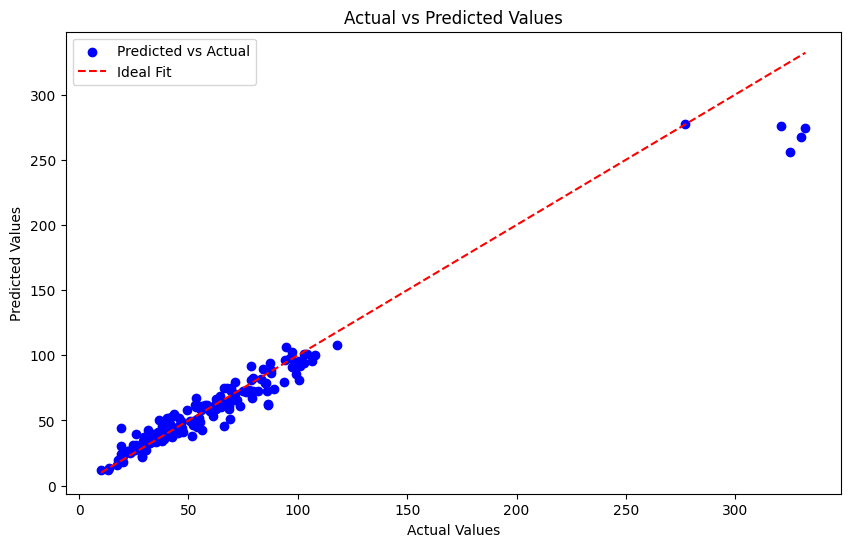

In [104]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(y_train_test, y_pred_rf, color='blue', label='Predicted vs Actual')
plt.plot([min(y_train_test), max(y_train_test)], [min(y_train_test), max(y_train_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


### Residuals vs Predicted Values

The scatter plot above shows the residuals (the difference between actual and predicted values) plotted against the predicted values.

- The **purple dots** represent the residuals for each of the predicted values. A positive residual indicates that the model has under-predicted, while a negative residual means that the model has over-predicted.
- The **red dashed line** at y = 0 represents the ideal scenario where the residuals should ideally be centered around zero, indicating that the model is equally biased in both directions.

Key Observations:
- **Homogeneity of residuals**: If the residuals are randomly scattered around the red dashed line, this indicates that the model's errors are distributed consistently across all predictions.
- **Pattern in residuals**: If any patterns are visible (e.g., a funnel shape, or clustering), it may suggest that the model is not capturing some underlying relationships in the data, and further improvement may be needed.


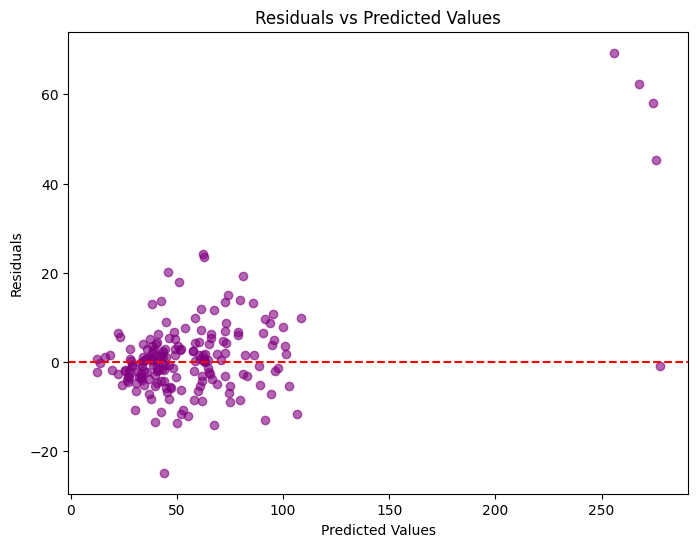

In [105]:
# Residual plot
residuals = y_train_test - y_pred_rf

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


### Random Forest Regression Example

This plot compares the **actual taxi fare** values with the **predicted values** from the Random Forest model:

- **Green circles** represent the **actual taxi fare data** points, showing the true observed values.
- **Black line** shows the **Random Forest predicted values**, which is the model's estimation of the taxi fare.

Key Observations:
- The predicted values closely follow the actual data, but there are some significant deviations, especially where the actual values are more extreme (e.g., data points around 50 and 120).
- The model is generally performing well but could potentially be improved, especially in areas with outliers or larger variations.


In [106]:
A = range(len(y_train_test))

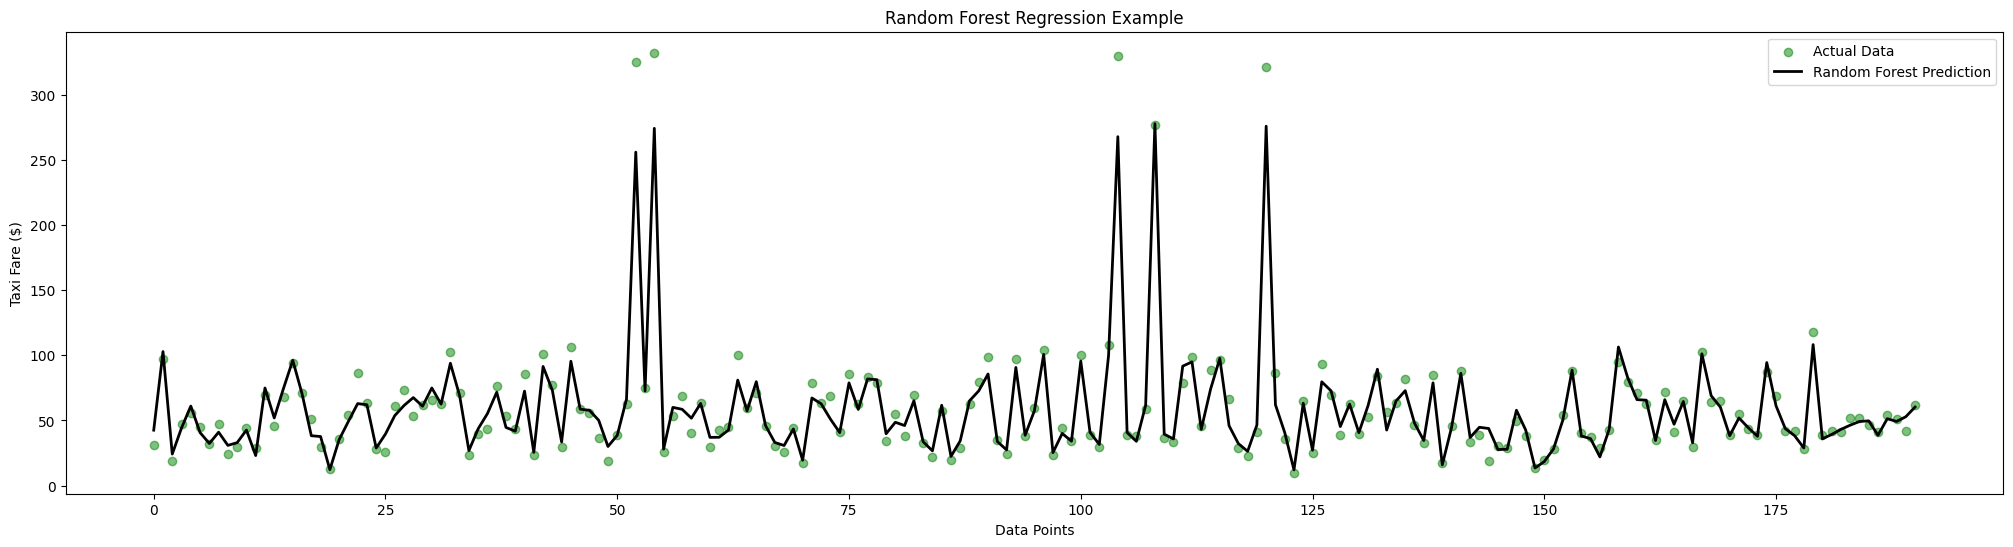

In [107]:
plt.figure(figsize=(25, 6))
plt.scatter(A, y_train_test, color='green', alpha=0.5, label='Actual Data')
plt.plot(A, y_pred_rf, color='black', label='Random Forest Prediction', linewidth=2)
plt.title('Random Forest Regression Example')
plt.xlabel('Data Points')
plt.ylabel('Taxi Fare ($)')
plt.legend()
plt.show()

# Experimentation

In [108]:
comparison_df = pd.DataFrame({'y_train_test': y_train_test, 'y_pred_rf': y_pred_rf})
comparison_df

,y_train_test,y_pred_rf
210,31.3844,42.596965
445,97.4848,102.853716
730,19.1069,24.270903
790,47.1770,44.281791
533,55.7598,61.053760
...,...,...
37,40.9225,38.679673
35,54.1018,51.392989
748,50.8979,49.257522
320,42.0962,52.884112


In [109]:
df['Trip_Price'].mean(), df['Trip_Price'].std(),df['Trip_Price'].median(), df['Trip_Price'].min(), df['Trip_Price'].max()

(56.87477332571041,
 40.46979055020966,
 50.07450000000001,
 6.1269,
 332.0436886774302)